# Character recognition using a trained MLP

In [80]:
# Character recognition using a trained MLP

import h5py
import math
import numpy as np
import matplotlib.pyplot as plt 

file_hd5 = h5py.File('mnist_network_params.hdf5', 'r')
list(file_hd5.keys())

wt1 = file_hd5['W1']
wt2 = file_hd5['W2']
wt3 = file_hd5['W3']
b1 = file_hd5['b1']
b2 = file_hd5['b2']
b3 = file_hd5['b3']

print(wt1.shape)
print(wt2.shape)
print(wt3.shape)
print(b1.shape)
print(b2.shape)
print(b3.shape)

(200, 784)
(100, 200)
(10, 100)
(200,)
(100,)
(10,)


In [81]:
file_test = h5py.File('mnist_testdata.hdf5', 'r')
list(file_test.keys())
x_data = file_test['xdata']
y_data = file_test['ydata']
x_data.shape

(10000, 784)

In [82]:
# ReLU and Softmax function implementation

def relu(vec):
    for i in range(0,vec.shape[0]):
        for j in range(0,vec.shape[1]):
            vec[i][j]=max(0,vec[i][j])
    return vec
 
def Softmax(x):
    lst=[]
    ele=np.exp(x)
    for i in ele:
        lst.append(i/np.sum(ele))
    return lst

In [83]:
inp_1 = x_data
op1 = np.dot(inp_1,np.transpose(wt1)) + b1

inp_2 = relu(op1)

inp_3 = relu(np.dot(inp_2,np.transpose(wt2)) + b2)
op2 = np.dot(inp_3,np.transpose(wt3)) + b3

In [85]:
# Finding the total number of correctly classified images

out = []
for i in range(op2.shape[0]):
    op3 = Softmax1(op2[i])
    out.append(op3)
    
output = [[round(i) for i in j] for j in out]  

count = 0
for i in range(len(out)):
    temp1 = np.argmax(out[i])
    temp2 = np.argmax(y_data[i])
    if temp1==temp2:
        count += 1

print(count)

9790


Observed value is [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] and true value is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 

Observed value is [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] and true value is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 

Observed value is [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] and true value is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 

Observed value is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] and true value is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 

Observed value is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] and true value is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 

Observed value is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] and true value is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 

Observed value is [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] and true value is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 

Observed value is [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] and true value is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 

Observed value is [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and true value is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 



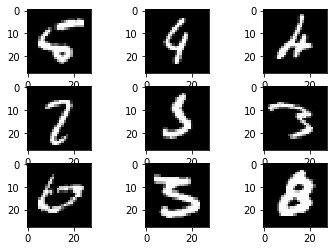

Correct classification: 9790
Incorrect classification: 210


In [86]:
# Sampling cases with correct classification and some with incorrect classification

import matplotlib.pyplot as plt 
for i in range(9):
    temp = wrong_count[i]
    print("Observed value is", wrong_list[i],"and true value is",y_data[temp],"\n")
    plt.subplot(330 + 1 + i)
    plt.imshow(x_data[temp].reshape(28,28),cmap=plt.get_cmap('gray')) 
plt.show()
print("Correct classification:",count)
print("Incorrect classification:",10000-count)


# LMS algorithm for channel modeling/tracking

In [107]:
# LMS algorithm for channel modeling/tracking
# LMS algorithm with input (regressor) vn and noisy target zn.

from scipy import signal
import pdb

l = h5py.File('lms_fun_v3.hdf5', 'r')
matched_10_v = l['matched_10_v']
matched_10_x = l['matched_10_x']
matched_10_y = l['matched_10_y']
matched_10_z = l['matched_10_z']
matched_3_v = l['matched_3_v']
matched_3_x = l['matched_3_x']
matched_3_y = l['matched_3_y']
matched_3_z = l['matched_3_z']
mismatched_v = l['mismatched_v']
mismatched_x = l['mismatched_x']
mismatched_y = l['mismatched_y']
timevarying_coefficents = l['timevarying_coefficents']
timevarying_v = l['timevarying_v']
timevarying_x = l['timevarying_x']
timevarying_y = l['timevarying_y']
timevarying_z = l['timevarying_z']

class LMS():
    def __init__(self, L=3, step=0.05):
        self.L = L
        self.step = step
        self.w = np.zeros(self.L)
        self.eps = 1e-3
    def adapt(self, x,v,d, N=600, normalize=False):
        assert len(x)==len(d)
        N = len(d)
        e=0
        for i in range(N):
            prod = np.inner(self.w, v[i,:])
            if normalize:
                self.w += self.step * (d[i]-prod) * v[i] / (np.inner(v[i],v[i])+self.eps)
            else:
                self.w += self.step * (d[i]-prod) * v[i]
            e+=(d[i]-(self.w.T)@v[i])**2
        
        e=e/N
        #print('LMS successfully adapted the weights!')
        return e,self.w


Text(0, 0.5, 'MSE')

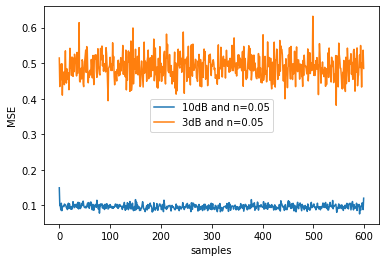

In [108]:
# Learning curves for n = 0.05 and n = 0.15 for each SNR
# n=0.05

l=np.arange(600)
ms_e_10=[]
lms=LMS()
for i in range(0,len(matched_10_x)):
    e,w=lms.adapt( matched_10_x[i],matched_10_v[i], matched_10_z[i],N=500, normalize=True)
    ms_e_10.append(e)
ms_e_10=np.array(ms_e_10)

ms_e_3=[]
lms=LMS()
for i in range(0,len(matched_3_x)):
    e,w=lms.adapt( matched_3_x[i],matched_3_v[i], matched_3_z[i],N=500, normalize=True)
    ms_e_3.append(e)
ms_e_3=np.array(ms_e_3)

fig=plt.figure()
plt.plot(l,ms_e_10,label = '10dB and n=0.05')
plt.plot(l,ms_e_3,label = '3dB and n=0.05')
plt.legend()
axes = plt.gca()
axes.set_xlabel('samples')
axes.set_ylabel('MSE')

Text(0, 0.5, 'MSE')

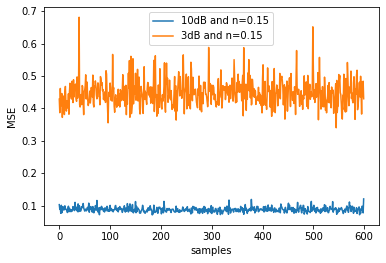

In [109]:
#n=0.15

class LMS():
    def __init__(self, L=3, step=0.15):
        self.L = L
        self.step = step
        self.w = np.zeros(self.L)
        self.eps = 1e-3
    def adapt(self, x,v,d, N=600, normalize=False):
        assert len(x)==len(d)
        N = len(d)
        e=0
        for i in range(N):
            prod = np.inner(self.w, v[i,:])
            if normalize:
                self.w += self.step * (d[i]-prod) * v[i] / (np.inner(v[i],v[i])+self.eps)
            else:
                self.w += self.step * (d[i]-prod) * v[i]
            e+=(d[i]-(self.w.T)@v[i])**2
        
        e=e/N
        #print('LMS successfully adapted the weights!')
        return e,self.w




l=np.arange(600)
ms_e_10=[]
lms=LMS()
for i in range(0,len(matched_10_x)):
    e,w=lms.adapt( matched_10_x[i],matched_10_v[i], matched_10_z[i],N=500, normalize=True)
    ms_e_10.append(e)
ms_e_10=np.array(ms_e_10)

ms_e_3=[]
lms=LMS()
for i in range(0,len(matched_3_x)):
    e,w=lms.adapt( matched_3_x[i],matched_3_v[i], matched_3_z[i],N=500, normalize=True)
    ms_e_3.append(e)
ms_e_3=np.array(ms_e_3)

fig=plt.figure()
plt.plot(l,ms_e_10,label = '10dB and n=0.15')
plt.plot(l,ms_e_3,label = '3dB and n=0.15')
plt.legend()
axes = plt.gca()
axes.set_xlabel('samples')
axes.set_ylabel('MSE')

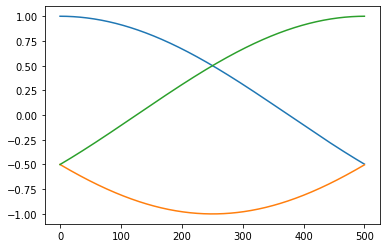

In [114]:
# Time Varying Coefficients

fig = plt.figure()
plt.plot(timevarying_coefficents[:,0])
plt.plot(timevarying_coefficents[:,1])
plt.plot(timevarying_coefficents[:,2])

Text(0, 0.5, 'MSE')

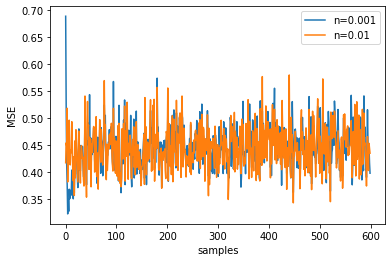

In [111]:
# LMS algorithm over all 600 sequences and plot of the average learning curve

l=np.arange(600)
ms_e=[]
lms=LMS(L=3,step=0.001)
for i in range(0,len(mismatched_x)):
    mse,w=lms.adapt( mismatched_x[i],mismatched_v[i], mismatched_y[i], N=500, normalize=True)
    ms_e.append(mse)
ms_e=np.array(ms_e)

ms_e1=[]
lms=LMS(L=3,step=0.01)
for i in range(0,len(mismatched_x)):
    mse,w=lms.adapt( mismatched_x[i],mismatched_v[i], mismatched_y[i], N=500, normalize=True)
    ms_e1.append(mse)
ms_e1=np.array(ms_e1)    


fig=plt.figure()

plt.plot(l,ms_e,label = 'n=0.001')
plt.plot(l,ms_e1,label = 'n=0.01')
plt.legend()
axes = plt.gca()
axes.set_xlabel('samples')
axes.set_ylabel('MSE')

In [112]:
rvn =[]
for i in range(600):
    rvn_s = np.dot(np.transpose(mismatched_v[i]),mismatched_v[i])
    rvn.append(rvn_s)
    
sum = np.zeros((3,3))
for i in range(600):
    sum+= rvn[i]
    
rvnf = (1/500)*(1/600)*sum

print(rvnf)
print("Rvn and rn are same")

[[ 1.00245847e+00 -5.40080480e-04  1.86860775e-03]
 [-5.40080480e-04  1.00070908e+00 -6.56615505e-04]
 [ 1.86860775e-03 -6.56615505e-04  9.98777566e-01]]
Rvn and rn are same


# Human vs Computer random sequences

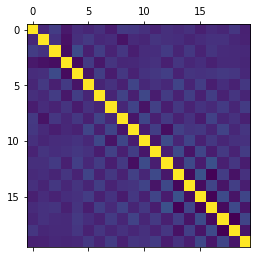

In [75]:
# Human vs Computer random sequences

hdf5_file = h5py.File('binary_random_sp2020.hdf5')
list(hdf5_file.keys())
human = hdf5_file['human']
human_cor = np.dot(np.transpose(human),human)/human.shape[0]
plt.matshow(human_cor, fignum=1)

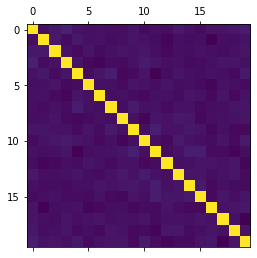

In [56]:
machine = hdf5_file['machine']
machine_cor = np.dot(np.transpose(machine),machine)/machine.shape[0]
fig1 = plt.matshow(machine_cor, fignum=1)

Text(0, 0.5, 'eigen-values of R-machine matrix')

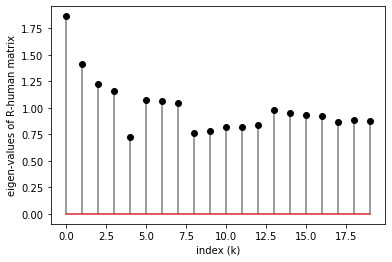

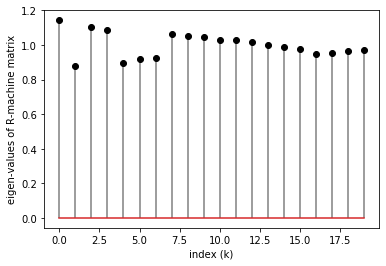

In [76]:
# Finding the eigen-vectors and eigen-values

eigen_values_h, eigen_vector_h = np.linalg.eig(human_cor) 
eigen_values_m, eigen_vector_m = np.linalg.eig(machine_cor) 

fig = plt.figure()
plt.stem(eigen_values_h, label = 'total', linefmt = 'tab:gray', markerfmt='ko', use_line_collection=True)
axes = plt.gca()
axes.set_xlabel('index (k)')
axes.set_ylabel('eigen-values of R-human matrix')

fig = plt.figure()
plt.stem(eigen_values_m, label = 'total', linefmt = 'tab:gray', markerfmt='ko', use_line_collection=True)
axes = plt.gca()
axes.set_xlabel('index (k)')
axes.set_ylabel('eigen-values of R-machine matrix')

In [22]:
print(eigen_values_h)

[1.86445274 1.41066602 1.22224377 1.1621398  0.72510586 1.07165554
 1.06036365 1.04442083 0.76690405 0.77767925 0.8161338  0.81887496
 0.8373276  0.97647406 0.95358847 0.93512971 0.92148329 0.87094899
 0.88590917 0.87849844]


In [23]:
top_2_eig_val_h = eigen_values_h[0] + eigen_values_h[1]
sum_eig_val_h = np.sum(eigen_values_h)
h_percentage = top_2_eig_val_h*100/sum_eig_val_h
print("The first two eigen values take",h_percentage,"%")

The first two eigen values take 16.37559379760543 %


Text(0, 0.5, 'e1 principle eigen-vector of R-machine matrix')

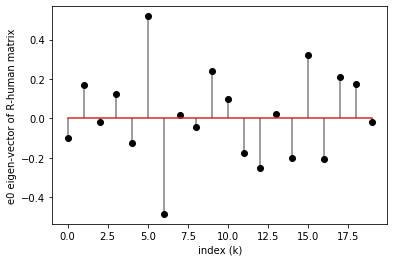

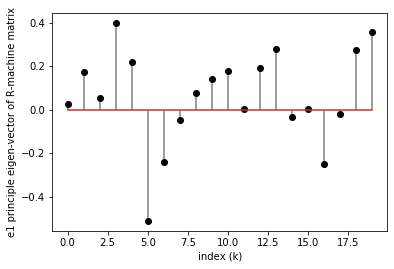

In [93]:
fig = plt.figure()
plt.stem(eigen_vector_h[0], label = 'total', linefmt = 'tab:gray', markerfmt='ko', use_line_collection=True)
axes = plt.gca()
axes.set_xlabel('index (k)')
axes.set_ylabel('e0 eigen-vector of R-human matrix')

fig = plt.figure()
plt.stem(eigen_vector_h[1], label = 'total', linefmt = 'tab:gray', markerfmt='ko', use_line_collection=True)
axes = plt.gca()
axes.set_xlabel('index (k)')
axes.set_ylabel('e1 principle eigen-vector of R-machine matrix')

Text(0, 0.5, 'sample pdf')

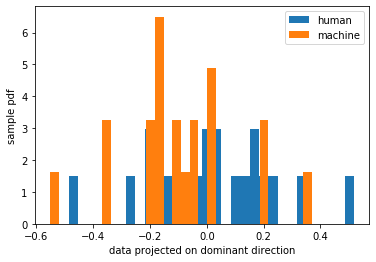

In [25]:
fig = plt.figure()
plt.hist(eigen_vector_h[0], bins = 30, density=True, label = 'human')
plt.hist(eigen_vector_m[0], bins = 30, density=True, label = 'machine')
plt.legend()
axes = plt.gca()
axes.set_xlabel('data projected on dominant direction')
axes.set_ylabel('sample pdf')

Text(0, 0.5, 'sample pdf')

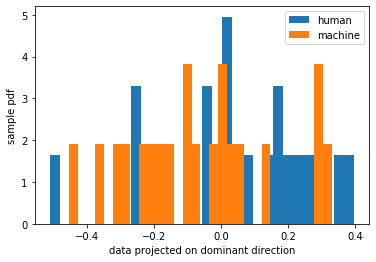

In [26]:
fig = plt.figure()
plt.hist(eigen_vector_h[1], bins = 30, density=True, label = 'human')
plt.hist(eigen_vector_m[1], bins = 30, density=True, label = 'machine')
plt.legend()
axes = plt.gca()
axes.set_xlabel('data projected on dominant direction')
axes.set_ylabel('sample pdf')

In [95]:
# Computation of linear classifier weight vector and error rate

human = (-1) * np.array(human)
machine = (-1) * np.array(machine)

y_human = np.ones( human.shape[0] ) * (+1)
y_machine = np.ones( machine.shape[0] ) * (-1)

X = np.vstack( ( human, machine ) )
y = np.append( y_human, y_machine ) 

w, Re, rank, singular_vals = np.linalg.lstsq(X, y, rcond=None)
X.T.shape
y_hat_soft = w @ X.T
y_hat_hard = np.sign( y_hat_soft )
prob_mc = np.mean( y != y_hat_hard )
print('mis classification rate: ', prob_mc)

mis classification rate:  0.4707784431137725


Text(0, 0.5, 'e1 direction')

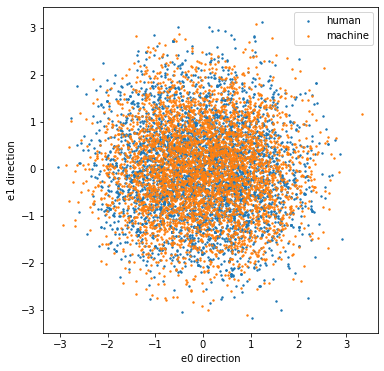

In [96]:
# Visualizing the data and classifier in two dimensions

b = h5py.File('binary_random_sp2020.hdf5')
machine = b['machine']
human = b['human']

E_tot =  ( human_cor + machine_cor ) / 2
E_tot_cor = np.dot(np.transpose(E_tot),E_tot)/E_tot.shape[0]
eigen_values_tot, eigen_vector_tot = np.linalg.eig(E_tot_cor) 
E01 = eigen_vector_tot[0:2]
human_proj = human @ E01.T
machine_proj = machine @ E01.T
fig = plt.figure(figsize=(6,6))
plt.scatter(human_proj.T[0], human_proj.T[1], label = 'human', s=2)
plt.scatter(machine_proj.T[0], machine_proj.T[1], label = 'machine', s=2)
plt.legend()
axes = plt.gca()
axes.set_xlabel('e0 direction')
axes.set_ylabel('e1 direction')

Text(0, 0.5, 'e1 direction')

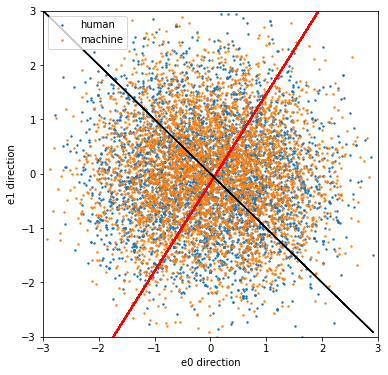

In [97]:
LIMIT = 3
fig = plt.figure(figsize=(6,6))
plt.scatter(human_proj.T[0], human_proj.T[1], label = 'human', s=2)
plt.scatter(machine_proj.T[0], machine_proj.T[1], label = 'machine', s=2)
plt.plot( human_proj.T[0], -1 * ( w[0] *  human_proj.T[0]  + w[2] ) / w[1], c='r' )
plt.plot( human_proj.T[0], -1 * human_proj.T[0], c='k' )
plt.legend()
axes = plt.gca()
axes.set_ylim([-1 * LIMIT, LIMIT])    
axes.set_xlim([-1 * LIMIT, LIMIT])
axes.set_xlabel('e0 direction')
axes.set_ylabel('e1 direction') 

In [101]:
# Computation of logistical regression weight vector and error rate

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
print('weights vector =',logreg.coef_)
y_hat_soft = np.dot((logreg.coef_), X.T)
y_hat_hard = np.sign( y_hat_soft )
prob_mc = np.mean( y != y_hat_hard )
print('\nerror rate: ', prob_mc)
print('\n')


weights vector = [[-0.080637    0.04976663  0.00815604 -0.07627245 -0.02109168 -0.01569919
   0.01840619 -0.03169724 -0.05087972 -0.02366543 -0.03842559 -0.01143525
   0.00048115 -0.02955728  0.04459654 -0.01196039 -0.01352877  0.00108253
   0.00383303  0.04158129]]

error rate:  0.4707784431137725




C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
